In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = "/content/drive/MyDrive/praktikum/praktikum3/"

In [7]:
# studi kasus regresi linear sederhana

# 1.load data

import pandas as pd

df = pd.read_csv(path + "/data/socr.csv")
df

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [9]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [11]:
# 2. praproses data, konversi data menjadi satuan cm (tinggi) dan kg (berat)

df1= (
    df[["Height(Inches)", "Weight(Pounds)"]]
    .rename(columns={"Height(Inches)":"tinggi_cm",
                     "Weight(Pounds)":"berat_kg"})
    .assign(tinggi_cm=lambda d: d["tinggi_cm"]*2.54,
            berat_kg=lambda d: d["berat_kg"]*0.45359237)
    .round({"tinggi_cm" : 2, "berat-kg":2})
).copy()

df1.head()


,tinggi_cm,berat_kg
0,167.09,51.252536
1,181.65,61.909598
2,176.27,69.411834
3,173.27,64.562251
4,172.18,65.452064


In [19]:
# 5. pembagian data, 80% training dan 20% test

from sklearn.model_selection import train_test_split

# variabel independent/bebas/fitur: tinggi badan
X = df1[["tinggi_cm"]]
# variabel dependent/terikat/target: berat badan
y = df1["berat_kg"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

print('data training ', len(X_train))
print('data testing ', len(X_test))

data training  20000
data testing  5000


In [24]:
# 6. pemodelan : training dan testing

from sklearn.linear_model import LinearRegression

# buat objek instant dari class LinearRegression bernama model
model = LinearRegression()
# jalankan training
model.fit(X_train, y_train)

LinearRegression()

In [38]:
# 7. evaluasi model

import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("koefisien (kg per cm)  :", model.coef_[0])
print("intersep (kg)          :", model.intercept_)
print("R2 (test)              :", r2)
print("MAE (kg)               :", mean_absolute_error(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE (kg)              :", rmse)

koefisien (kg per cm)  : 0.5518260307304572
intersep (kg)          : -37.65759374196467
R2 (test)              : 0.24989237125707497
MAE (kg)               : 3.670470232111709
RMSE (kg)              : 4.609061432650199


In [26]:
# persamaan regresi

slope = model.coef_[0]
intercept = model.intercept_

print(f"persamaan regresi: y = {slope:.3f} * x + {intercept:.3f}")

persamaan regresi: y = 0.552 * x + -37.658


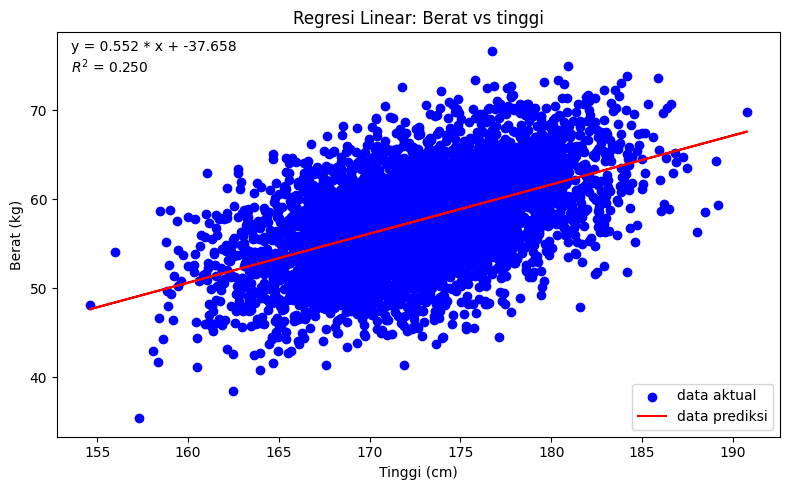

In [28]:
# 9. plot regresi

import matplotlib.pyplot as plt

# plot data scatter
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='data aktual')
# garis regresi
plt.plot(X_test, y_pred, color='red', label='data prediksi')
plt.xlabel('Tinggi (cm)')
plt.ylabel('Berat (kg)')
plt.title('Regresi Linear: Berat vs tinggi')
plt.text(
    0.02, 0.98,
    f"y = {slope:.3f} * x + {intercept:.3f}\n$R^2$ = {r2:.3f}",
    transform=plt.gca().transAxes,va="top"
)
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
# uji dengan data testing baru kelas ml siang

data_baru = pd.read_csv(path + "/data/berat_kelas_mlsiang.csv", sep=';')
# prediksi berat data baru
y_pred_baru = model.predict(data_baru[['tinggi_cm']])
data_baru['prediksi_kg']=y_pred_baru
data_baru['selisih error (kg)']= data_baru['prediksi_kg'] - data_baru['berat_aktual']
denom = data_baru['berat_aktual'].replace(0, np.nan)
data_baru["akurasi (%)"] = (1 - (data_baru['selisih error (kg)'].abs() / denom)).clip(lower=0, upper=1) * 100
data_baru

,no,nama,tinggi_cm,berat_aktual,prediksi_kg,selisih error (kg),akurasi (%)
0,1,muflih,153,43.5,46.771789,3.271789,92.478646
1,2,anis,157,46.5,48.979093,2.479093,94.668617
2,3,autum,170,75.2,56.152831,-19.047169,74.671318
3,4,hasan,150,48.9,45.116311,-3.783689,92.262394
4,5,azis,163,52.6,52.290049,-0.309951,99.410740
